# YouTube trending videos data analysis
* The dataset from [Kaggle](https://www.kaggle.com/datasnaek/youtube-new "the new site").Here I will analyse USA trending videos.
* Purpose of project
>1 What is the most popular category in YouTube trending list? 
<br>2 Are there any correlations between the number of views, likes, dislikes and comments? 
<br>3 Is number of tags related to video becoming trendy? 
<br>4 Is there a gold time to post a video? 

In [80]:
import json
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time

### Read the original dataset
* to understand the basic data information

In [81]:
filename = open('USvideos.csv')
dataframe = pd.read_csv(filename)
dataframe.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


In [82]:
dataframe.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

### Renaming the categorys id to names

In [83]:
jsonfile = open('US_category_id.json', 'r')
id_to_category = {}
category_id = json.load(jsonfile)
with open('US_category_id.json', 'r') as file:
    for item in category_id['items']:
        id_to_category[item['id']] = item['snippet']['title']
print(id_to_category)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '29': 'Nonprofits & Activism', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


In [84]:
dataframe['category_id'] = dataframe['category_id'].astype('str')
dataframe.insert(4, 'category', dataframe['category_id'].map(id_to_category))
dataframe.head(1)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


## Selecting the subdataframe, remove useless columns

In [85]:
sub_dataframe = dataframe.drop(labels=['video_id', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 
                                        'video_error_or_removed', 'description'], axis=1, inplace=False)
sub_dataframe.head(1)

,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954


## Looking the correlation between views, likes, dislikes and comment_count

In [86]:
keep_columns = ['views', 'likes', 'dislikes', 'comment_count']
corr_matrix = sub_dataframe[keep_columns].corr()
print(corr_matrix)

                  views     likes  dislikes  comment_count
views          1.000000  0.849177  0.472213       0.617621
likes          0.849177  1.000000  0.447186       0.803057
dislikes       0.472213  0.447186  1.000000       0.700184
comment_count  0.617621  0.803057  0.700184       1.000000


  As a result, the likes and views had a strong relationship, followed by the likes and comment count. As expected, the highest views of videos are liked by users, and users are also happy to comment on videos they like. However, the number of dislikes and comment counts also had a relatively strong relationship. It seems that videos that many people do not like can also trigger widespread discussions.

## Which category has the most trending videos?

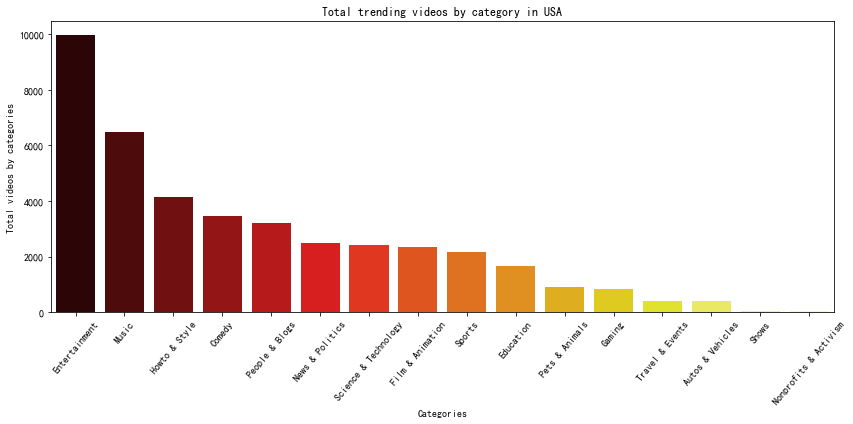

In [87]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data = sub_dataframe, palette='hot', order=sub_dataframe['category'].value_counts().index)
plt.xticks(rotation=50)
plt.xlabel('Categories')
plt.ylabel('Total videos by categories')
plt.title('Total trending videos by category in USA')
plt.tight_layout()
plt.show()

 According to the result, it is obviously the entertainment is the most popular category, it has almost 10000 times on the trending list. Followed by the music category. As expected, most people visit YouTube website is to watch some funny or music videos for relaxing. And entertainment and music had wider audiences, no matter kids or adults, female or male, students or employee, everyone would like to watch them.

## Is number of tags related to video becoming trendy? 

In [88]:
def staTagsNum(tags):
    return len(tags.split("|"))
sub_dataframe["tags_num"] = sub_dataframe["tags"].apply(staTagsNum)

In [89]:
print(sub_dataframe["tags_num"].min())
print(sub_dataframe["tags_num"].max())

1
69


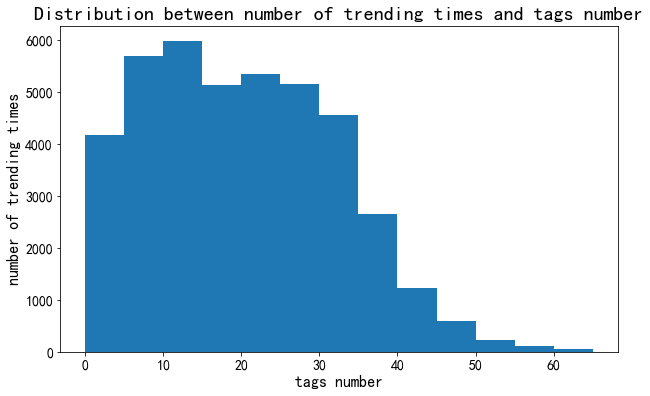

In [90]:
#the Histogram
plt.figure(figsize=(10,6))
plt.hist(sub_dataframe["tags_num"], bins=np.arange(0,70,5))
plt.title("Distribution between number of trending times and tags number", fontsize=20)
plt.xlabel("tags number", fontsize=16)
plt.ylabel("number of trending times", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

It shows that the more tags did not represent more times on the trending list. The tags number between 1 and 5 still got over 4000 times on the trending list. Once the number of tags over 35, the more tags have then got fewer trending times. So, it does not mean that the more tags number represent the more trending times. The best number of tags is between 5 to 30.

## showing the different category in different number of tags

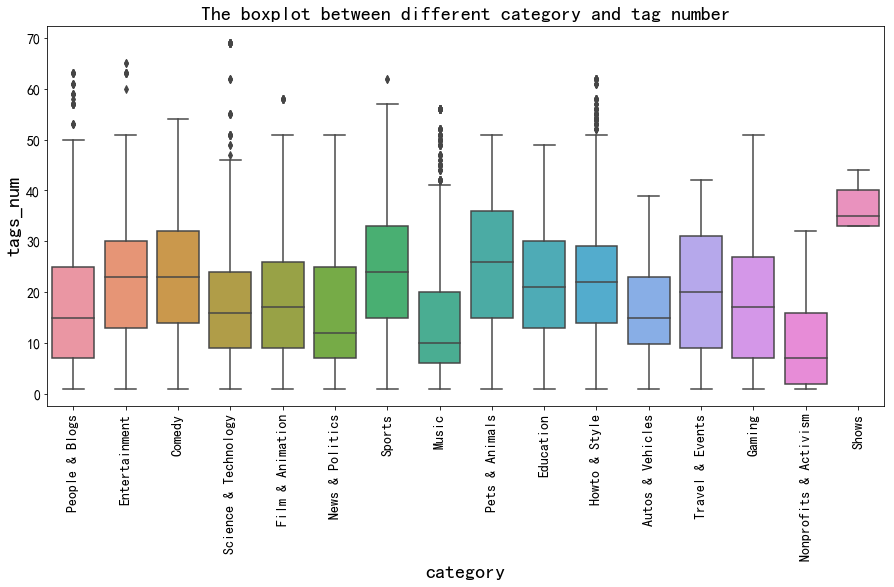

In [91]:
plt.figure(figsize=(15,7))
plt.title("The boxplot between different category and tag number", fontsize=20)
sns.boxplot('category','tags_num',data=sub_dataframe)
plt.ylabel('tags_num',fontsize=20.0)
plt.xlabel('category',fontsize=20.0)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

As we can see, the output shows category are most likely to tag, however, from the previous analysis, if the tags number over 35, then it will get fewer trending times, it is also displayed in the first graph, the output shows category had the fewest trending times.

## Is there a gold time to post a video? 

In [92]:
def getWeek(publish_time):
    publish_date = publish_time[0:10]
    return str(time.strptime(publish_date,"%Y-%m-%d").tm_wday + 1)

def getHour(publish_time):
    publish_date = publish_time[11:19]
    return time.strptime(publish_date,"%H:%M:%S").tm_hour

In [93]:
sub_dataframe["publish_Week"] = sub_dataframe["publish_time"].apply(getWeek)
sub_dataframe["publish_Hour"] = sub_dataframe["publish_time"].apply(getHour)
sub_dataframe.head()

,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,tags_num,publish_Week,publish_Hour
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,1,1,17
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,4,1,7
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,23,7,19
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,27,1,11
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,14,7,18


## Count the trending times by days in week

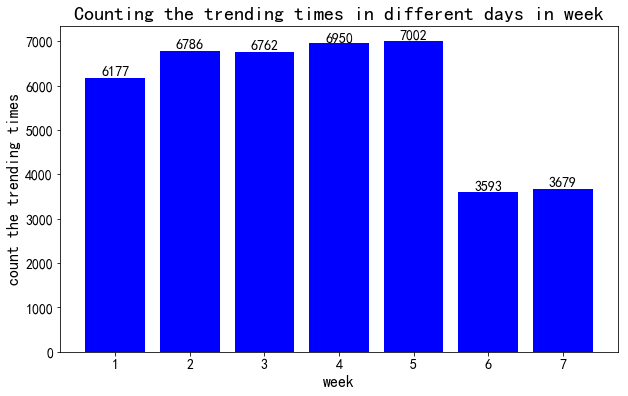

In [94]:
publish_time = sub_dataframe[["publish_Week", "category_id"]].groupby("publish_Week").count()
plt.figure(figsize=(10,6))
plt.bar(range(len(publish_time)), publish_time["category_id"], fc='b', tick_label=publish_time.index)
plt.title("Counting the trending times in different days in week", fontsize=20)
plt.xlabel("week", fontsize=16)
plt.ylabel("count the trending times", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for a,b in zip(range(len(publish_time)),publish_time["category_id"]):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=14)
plt.show()

It was found that the video released on the weekend did not performed well on the trending list. The videos released from Monday to Friday that the trending times is much better than the weekend. We probably thought the more people will have time to watch videos on weekend, but I guess that the publisher would be professional videos maker and have break on weekend, or the internals of the YouTube recommendation mechanism.

## Counting the trending times by hours in day

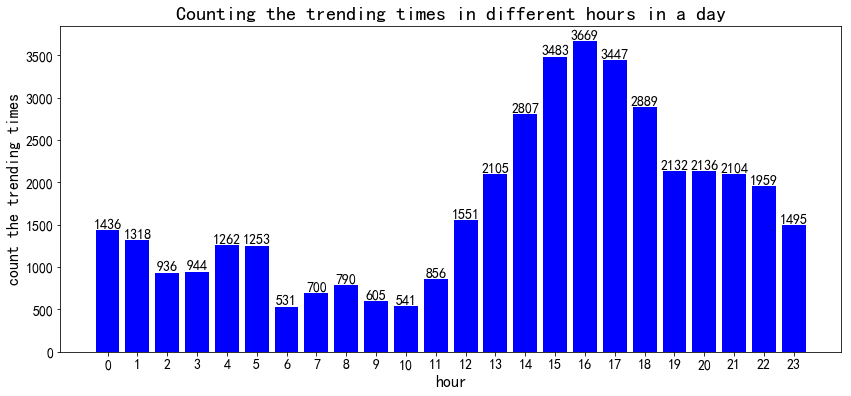

In [95]:
publish_time = sub_dataframe[["publish_Hour", "category_id"]].groupby("publish_Hour").count()
plt.figure(figsize=(14,6))
plt.bar(range(len(publish_time)), publish_time["category_id"], fc='b', tick_label=publish_time.index)
plt.title("Counting the trending times in different hours in a day", fontsize=20)
plt.xlabel("hour", fontsize=16)
plt.ylabel("count the trending times", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for a,b in zip(range(len(publish_time)),publish_time["category_id"]):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=14)
plt.show()

It was found that the majority videos on trending list released from 2pm to 6pm, especially around 4pm, over 3500 videos released on that time.